In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('./rawdata/metro_data_restart.xlsx')
df

,사용월,호선명,지하철역,행정구역,대합실면적,승강장면적,월일수,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202111,우이신설선,4.19민주묘지,강북구,NaN,NaN,30,2,0,1231,...,2179,0,28,0,0,0,0,0,0,20211203
1,202112,우이신설선,4.19민주묘지,강북구,NaN,NaN,31,0,1,1048,...,1720,0,0,0,0,0,0,0,0,20220103
2,202201,우이신설선,4.19민주묘지,강북구,NaN,NaN,31,3,2,897,...,1309,0,0,0,0,0,0,0,0,20220203
3,202202,우이신설선,4.19민주묘지,강북구,NaN,NaN,28,0,0,806,...,1293,0,0,0,0,0,0,0,0,20220303
4,202203,우이신설선,4.19민주묘지,강북구,NaN,NaN,31,0,0,1083,...,2136,1,40,0,0,0,0,0,0,20220403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13056,202406,9호선,흑석(중앙대입구),동작구,NaN,NaN,30,4,0,3728,...,7126,1071,2518,0,33,0,1,0,0,20240703
13057,202407,9호선,흑석(중앙대입구),동작구,NaN,NaN,31,0,0,3704,...,6699,652,2727,0,25,0,0,0,0,20240803
13058,202408,9호선,흑석(중앙대입구),동작구,NaN,NaN,31,5,0,3393,...,6354,575,2372,0,27,0,0,0,0,20240903
13059,202409,9호선,흑석(중앙대입구),동작구,NaN,NaN,30,8,0,3302,...,6146,955,2272,7,42,0,2,0,0,20241003


In [4]:

for col in df.columns :
    if '승차인원' in col :
        exit_col = col.replace('승차인원', '하차인원')
        if exit_col in df.columns :
            stay_col = col.replace('승차인원', '체류인원')
            df[stay_col] = df[col] + df[exit_col]

df.head(2)

,사용월,호선명,지하철역,행정구역,대합실면적,승강장면적,월일수,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,...,18시-19시 체류인원,19시-20시 체류인원,20시-21시 체류인원,21시-22시 체류인원,22시-23시 체류인원,23시-24시 체류인원,00시-01시 체류인원,01시-02시 체류인원,02시-03시 체류인원,03시-04시 체류인원
0,202111,우이신설선,4.19민주묘지,강북구,NaN,NaN,30,2,0,1231,...,11217,9453,5773,4917,4159,2485,28,0,0,0
1,202112,우이신설선,4.19민주묘지,강북구,NaN,NaN,31,0,1,1048,...,10614,8862,5897,5278,3839,1983,0,0,0,0


In [13]:
df.to_csv('./rawdata/metro_data_2.csv', index=False)

In [5]:
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')

### 월별 총 체류인원 분포

In [6]:
# 월별 총 체류인원 분포

df

,사용월,호선명,지하철역,행정구역,대합실면적,승강장면적,월일수,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,...,18시-19시 체류인원,19시-20시 체류인원,20시-21시 체류인원,21시-22시 체류인원,22시-23시 체류인원,23시-24시 체류인원,00시-01시 체류인원,01시-02시 체류인원,02시-03시 체류인원,03시-04시 체류인원
0,202111,우이신설선,4.19민주묘지,강북구,NaN,NaN,30,2,0,1231,...,11217,9453,5773,4917,4159,2485,28,0,0,0
1,202112,우이신설선,4.19민주묘지,강북구,NaN,NaN,31,0,1,1048,...,10614,8862,5897,5278,3839,1983,0,0,0,0
2,202201,우이신설선,4.19민주묘지,강북구,NaN,NaN,31,3,2,897,...,9469,8357,5466,5723,3547,1467,0,0,0,0
3,202202,우이신설선,4.19민주묘지,강북구,NaN,NaN,28,0,0,806,...,8682,7466,4861,4527,3201,1428,0,0,0,0
4,202203,우이신설선,4.19민주묘지,강북구,NaN,NaN,31,0,0,1083,...,12339,9528,5956,4907,3900,2421,41,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13056,202406,9호선,흑석(중앙대입구),동작구,NaN,NaN,30,4,0,3728,...,45856,30451,23989,22119,20973,12029,3589,33,1,0
13057,202407,9호선,흑석(중앙대입구),동작구,NaN,NaN,31,0,0,3704,...,43499,29759,22140,19707,18583,9695,3379,25,0,0
13058,202408,9호선,흑석(중앙대입구),동작구,NaN,NaN,31,5,0,3393,...,42967,28325,21443,18406,17750,9208,2947,27,0,0
13059,202409,9호선,흑석(중앙대입구),동작구,NaN,NaN,30,8,0,3302,...,46506,29741,23223,21680,19559,10470,3227,49,2,0


In [24]:
# 월별 체류인원 평균

monthly_avg_stay = df.groupby('사용월').mean(numeric_only=True).reset_index()

stay_avg = monthly_avg_stay[['사용월'] + [col for col in df.columns if '체류인원' in col]]

stay_avg.head(3)

,사용월,04시-05시 체류인원,05시-06시 체류인원,06시-07시 체류인원,07시-08시 체류인원,08시-09시 체류인원,09시-10시 체류인원,10시-11시 체류인원,11시-12시 체류인원,12시-13시 체류인원,...,18시-19시 체류인원,19시-20시 체류인원,20시-21시 체류인원,21시-22시 체류인원,22시-23시 체류인원,23시-24시 체류인원,00시-01시 체류인원,01시-02시 체류인원,02시-03시 체류인원,03시-04시 체류인원
0,202111,124.480556,6245.833333,17849.391667,45634.983333,81525.930556,51951.930556,33079.341667,31406.927778,33515.277778,...,82213.730556,49534.427778,32087.377778,29451.297222,25349.766667,12488.613889,1010.025000,0.397222,0.063889,0.002778
1,202112,113.688022,5930.749304,17171.958217,44150.515320,79381.011142,50076.902507,32253.142061,30784.420613,33284.323120,...,79830.459610,47715.175487,32682.289694,33887.534819,21929.247911,9229.381616,635.072423,0.300836,0.061281,0.002786
2,202201,95.225000,5320.411111,15563.411111,39575.916667,72762.052778,47103.897222,30616.141667,29616.252778,32276.244444,...,73437.205556,44274.011111,32663.513889,38911.847222,17621.177778,5695.238889,324.263889,0.200000,0.050000,0.000000


In [25]:
# 사용월을 인덱스로 설정하고 이름 바꾸기

monthly_avg = monthly_avg_stay[['사용월'] + [col for col in df.columns if '체류인원' in col]].set_index('사용월')
monthly_avg.index.name = 'monthly'

monthly_avg.head(3)

,04시-05시 체류인원,05시-06시 체류인원,06시-07시 체류인원,07시-08시 체류인원,08시-09시 체류인원,09시-10시 체류인원,10시-11시 체류인원,11시-12시 체류인원,12시-13시 체류인원,13시-14시 체류인원,...,18시-19시 체류인원,19시-20시 체류인원,20시-21시 체류인원,21시-22시 체류인원,22시-23시 체류인원,23시-24시 체류인원,00시-01시 체류인원,01시-02시 체류인원,02시-03시 체류인원,03시-04시 체류인원
monthly,,,,,,,,,,,,,,,,,,,,,
202111,124.480556,6245.833333,17849.391667,45634.983333,81525.930556,51951.930556,33079.341667,31406.927778,33515.277778,35487.022222,...,82213.730556,49534.427778,32087.377778,29451.297222,25349.766667,12488.613889,1010.025000,0.397222,0.063889,0.002778
202112,113.688022,5930.749304,17171.958217,44150.515320,79381.011142,50076.902507,32253.142061,30784.420613,33284.323120,35639.534819,...,79830.459610,47715.175487,32682.289694,33887.534819,21929.247911,9229.381616,635.072423,0.300836,0.061281,0.002786
202201,95.225000,5320.411111,15563.411111,39575.916667,72762.052778,47103.897222,30616.141667,29616.252778,32276.244444,34702.330556,...,73437.205556,44274.011111,32663.513889,38911.847222,17621.177778,5695.238889,324.263889,0.200000,0.050000,0.000000


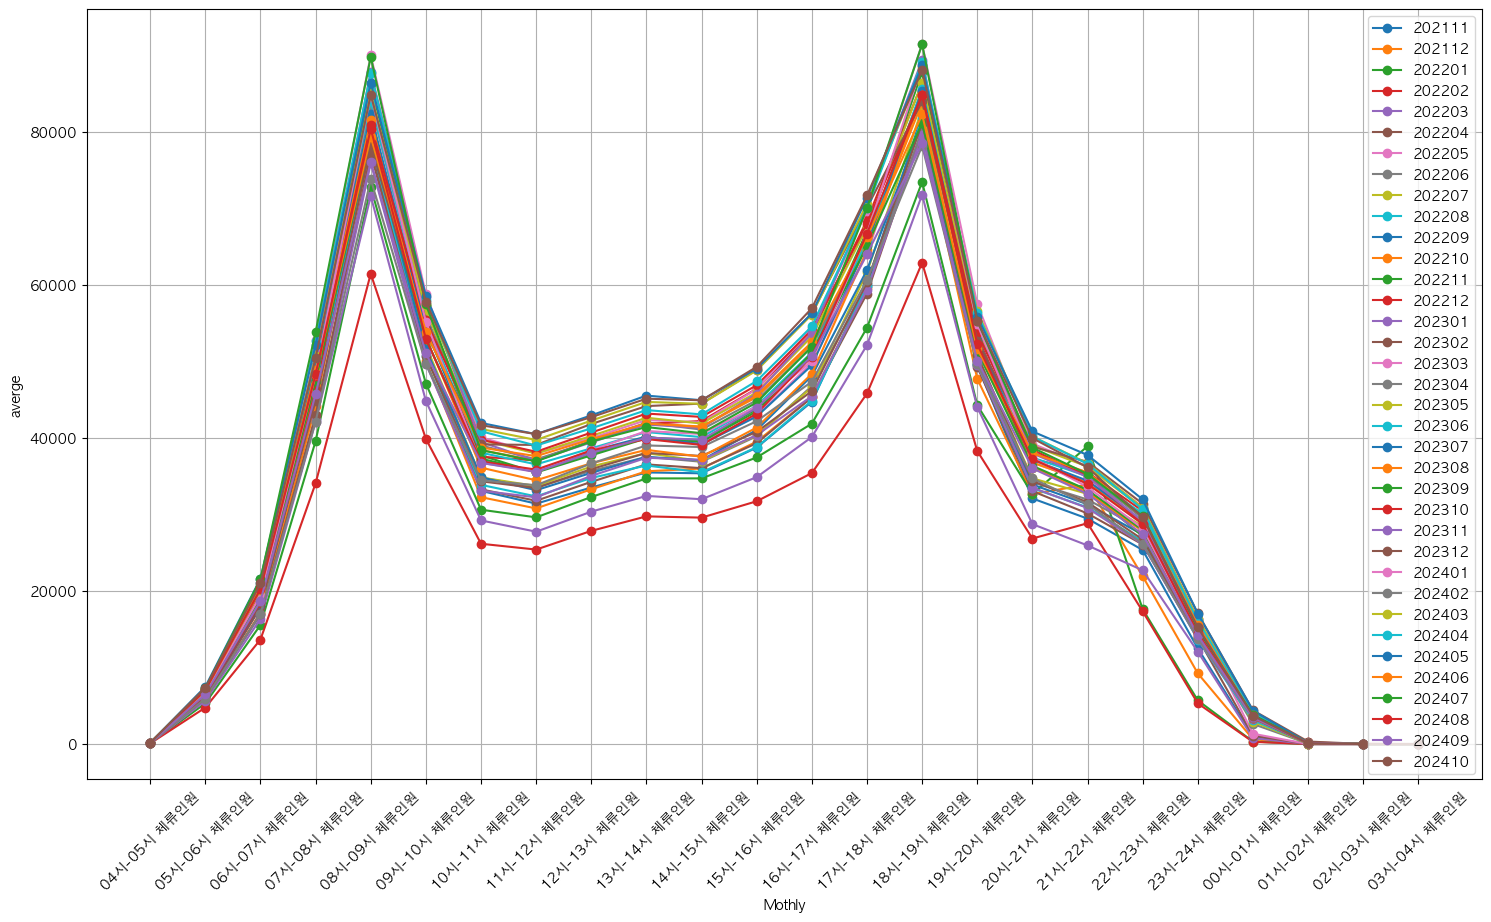

In [23]:
# 월별 체류인원 변화 line graph

plt.figure(figsize=(18,10))

for monthly in monthly_avg.index:
    plt.plot([col for col in monthly_avg.columns if '체류인원' in col], monthly_avg.loc[monthly], marker='o', label=str(monthly))

plt.xlabel('Mothly')
plt.ylabel('averge')
plt.xticks(rotation=45)
plt.grid()
plt.legend(loc='best')

plt.show()

In [33]:
# 월별 시간대 평균 중 상위 10% 월만 

top_10 = monthly_avg[monthly_avg.max(axis=1) > monthly_avg.quantile(0.9).max()]
top_10


,04시-05시 체류인원,05시-06시 체류인원,06시-07시 체류인원,07시-08시 체류인원,08시-09시 체류인원,09시-10시 체류인원,10시-11시 체류인원,11시-12시 체류인원,12시-13시 체류인원,13시-14시 체류인원,...,18시-19시 체류인원,19시-20시 체류인원,20시-21시 체류인원,21시-22시 체류인원,22시-23시 체류인원,23시-24시 체류인원,00시-01시 체류인원,01시-02시 체류인원,02시-03시 체류인원,03시-04시 체류인원
monthly,,,,,,,,,,,,,,,,,,,,,
202303,131.013774,6909.382920,20109.545455,52799.294766,89991.495868,58770.542700,40074.528926,37974.719008,39959.776860,42336.878788,...,91456.520661,57478.774105,39250.275482,36276.264463,30991.716253,16215.812672,3995.187328,119.341598,0.157025,0.000000
202311,141.101648,6995.750000,20198.862637,50911.634615,87833.791209,58427.980769,39463.192308,37014.936813,39420.807692,41735.142857,...,89361.230769,54982.615385,37976.777473,34883.615385,29102.890110,15085.642857,3753.351648,124.884615,0.096154,0.000000
202404,142.912329,7113.323288,21050.386301,52624.684932,87651.254795,58022.797260,40867.263014,38994.641096,41246.347945,43628.339726,...,89101.216438,56288.268493,40186.572603,36596.736986,30665.471233,16028.920548,4045.493151,118.189041,0.090411,0.005479
202407,151.520548,7280.021918,21539.506849,53824.717808,89772.783562,57431.827397,38402.780822,36936.046575,39531.049315,41418.082192,...,91429.035616,55329.326027,38728.106849,35279.473973,29764.638356,15004.446575,3823.542466,113.008219,0.041096,0.005479


In [34]:
# 월별 시간대 평균 중 하위 10% 월만 

bottom_10 = monthly_avg[monthly_avg.max(axis=1) < monthly_avg.quantile(0.1).max()]
bottom_10


,04시-05시 체류인원,05시-06시 체류인원,06시-07시 체류인원,07시-08시 체류인원,08시-09시 체류인원,09시-10시 체류인원,10시-11시 체류인원,11시-12시 체류인원,12시-13시 체류인원,13시-14시 체류인원,...,18시-19시 체류인원,19시-20시 체류인원,20시-21시 체류인원,21시-22시 체류인원,22시-23시 체류인원,23시-24시 체류인원,00시-01시 체류인원,01시-02시 체류인원,02시-03시 체류인원,03시-04시 체류인원
monthly,,,,,,,,,,,,,,,,,,,,,
202201,95.225000,5320.411111,15563.411111,39575.916667,72762.052778,47103.897222,30616.141667,29616.252778,32276.244444,34702.330556,...,73437.205556,44274.011111,32663.513889,38911.847222,17621.177778,5695.238889,324.263889,0.200000,0.050000,0.0
202202,84.317549,4760.623955,13656.320334,34070.877437,61442.272981,39875.841226,26167.225627,25409.203343,27851.743733,29746.384401,...,62885.353760,38290.830084,26849.314763,28849.027855,17339.593315,5312.317549,289.610028,0.192201,0.038997,0.0
202203,105.038997,5649.724234,16340.637883,42098.738162,71598.484680,44825.136490,29216.303621,27743.479109,30360.947075,32417.253482,...,71767.125348,44030.239554,28732.005571,25948.643454,22700.058496,12063.038997,783.072423,0.286908,0.077994,0.0
202402,114.390710,5937.079235,17027.284153,42139.631148,73792.128415,49663.535519,34455.379781,33819.478142,36661.090164,39013.663934,...,78145.991803,49635.382514,34697.377049,31319.721311,26189.918033,13759.210383,3446.551913,122.188525,0.781421,0.0


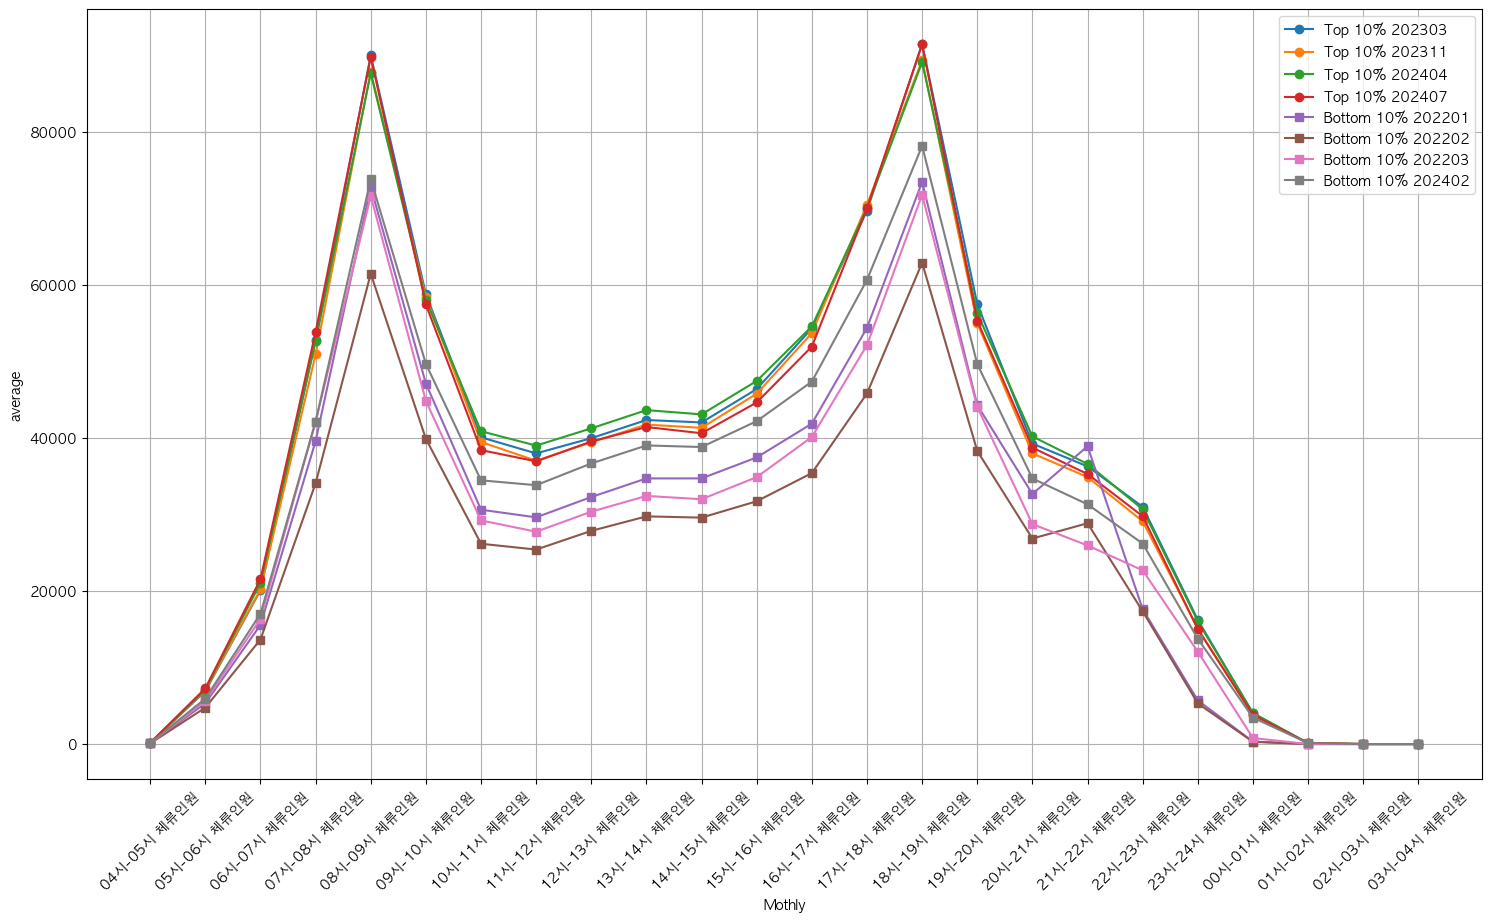

In [35]:
plt.figure(figsize=(18,10))

for monthly in top_10.index:
    plt.plot([col for col in top_10.columns if '체류인원' in col], 
             top_10.loc[monthly], marker='o', label=f'Top 10% {monthly}')

for monthly in bottom_10.index:
    plt.plot([col for col in bottom_10.columns if '체류인원' in col], 
             bottom_10.loc[monthly], marker='s', label=f'Bottom 10% {monthly}')


plt.xlabel('Mothly')
plt.ylabel('average')
plt.xticks(rotation=45)
plt.grid()
plt.legend(loc='best')

plt.show()

In [21]:
# 연도별 체류인원 평균

stay_avg['Year'] = stay_avg['사용월'].astype(str).str[:4].astype(int)

year_df = stay_avg.groupby('Year').mean(numeric_only=True).reset_index()

year_df = year_df[['Year'] + [col for col in year_df.columns if '체류인원' in col]].set_index('Year')
year_df


/var/folders/bf/2n9rmq1d29n28hv6f6gh6gxw0000gn/T/ipykernel_751/684355368.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stay_avg['Year'] = stay_avg['사용월'].astype(str).str[:4].astype(int)


,04시-05시 체류인원,05시-06시 체류인원,06시-07시 체류인원,07시-08시 체류인원,08시-09시 체류인원,09시-10시 체류인원,10시-11시 체류인원,11시-12시 체류인원,12시-13시 체류인원,13시-14시 체류인원,...,18시-19시 체류인원,19시-20시 체류인원,20시-21시 체류인원,21시-22시 체류인원,22시-23시 체류인원,23시-24시 체류인원,00시-01시 체류인원,01시-02시 체류인원,02시-03시 체류인원,03시-04시 체류인원
Year,,,,,,,,,,,,,,,,,,,,,
2021,119.084289,6088.291318,17510.674942,44892.749327,80453.470849,51014.416531,32666.241864,31095.674195,33399.800449,35563.278521,...,81022.095083,48624.801633,32384.833736,31669.416021,23639.507289,10858.997752,822.548712,0.349029,0.062585,0.002782
2022,119.324904,6258.948021,17955.215718,45127.228371,77866.472909,50685.691205,34031.458688,32699.842320,35147.923448,37216.360064,...,79812.226305,48996.301185,33700.411127,32324.288549,25884.251422,12970.430813,2264.779821,63.666590,2.972514,0.362261
2023,132.419659,6761.201549,19388.074222,48146.111137,82085.667384,54583.794446,37752.997021,36275.620803,38683.387742,40905.792230,...,84917.957920,53083.475408,37213.502033,34370.113739,29031.153276,15266.818274,3711.440842,131.365021,1.527567,0.003208
2024,142.145667,6961.824473,20117.271710,49254.316224,82822.223668,55182.975567,38761.375782,37514.881614,39994.907704,42205.791297,...,85808.879055,53782.811518,38327.840852,34948.944394,29307.506553,15201.911483,3755.284235,115.114574,0.256847,0.003018


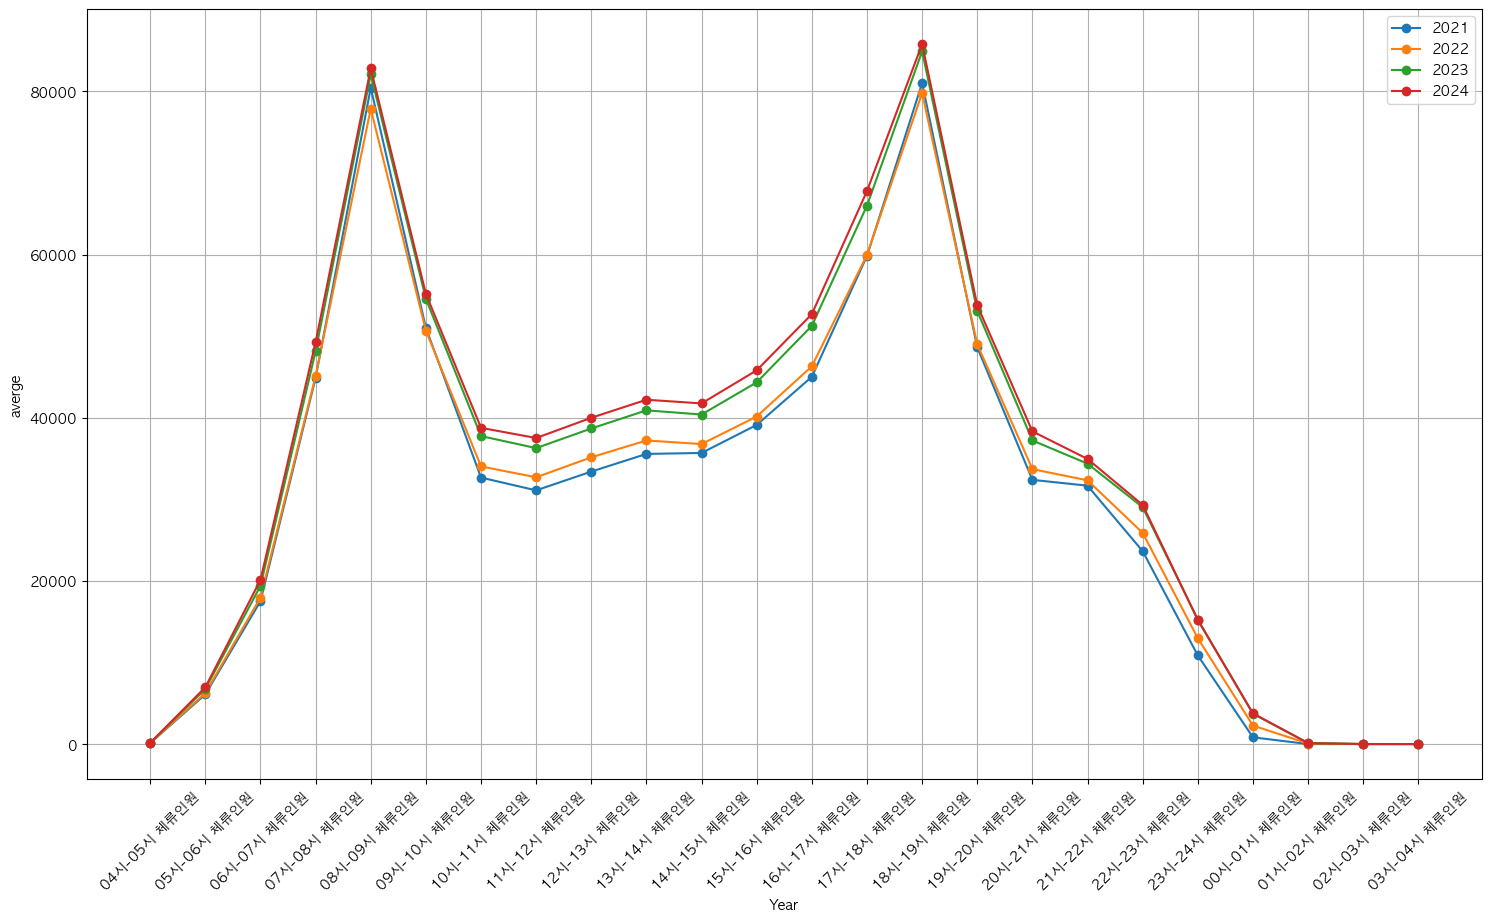

In [12]:
# 연도별 체류인원 변화 line graph

plt.figure(figsize=(18,10))

for Year in year_df.index:
    plt.plot([col for col in year_df.columns if '체류인원' in col], year_df.loc[Year], marker='o', label=str(Year))

plt.xlabel('Year')
plt.ylabel('averge')
plt.xticks(rotation=45)
plt.grid()
plt.legend(loc='best')

plt.show()

-해가 지날 수록 지하철 사용인원이 조금씩 증가하고 있으나,
    지하철 사용 승객들의 사용패턴은 동일한 패턴을 보이고 있음
- 오전 시간대의 가장 많은 사용 패턴이 보이는 시간대를 고려하면, 서울의 평균 출근 시간은 7시 30분 ~ 8시 30분 정도로 추측이 가능하며
    오후 시간대의 가장 많은 사용 패턴이 보이는 시간대를 고려하면 서울의 평균 퇴근 시간은 5시 30부 ~ 6시 정도로 추측이 가능
- 19시 ~ 22시 까지의 사용량이 완만하게 줄어드는 패턴은 서울시 직장인들의 야근 or 서울 행정구역 내에서의 약속 후 귀가하는 최종 시간으로 추측